In [1]:
%load_ext autoreload
%autoreload 2

import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

sns.set_style('whitegrid')

sys.path.append("../sta831-sp23/")
from utility.ar import AR

In [2]:
# %matplotlib widget

## Data

In [3]:
pleth = pd.read_csv("data/Pleth.csv", header=None, names=['time', 'pleth']).set_index('time')['pleth']
ecg1 = pd.read_csv("data/ECG1.csv", header=None, names=['time', 'ecg1']).set_index('time')['ecg1']

In [4]:
n = pleth.shape[0]
# start = np.random.randint(0, n)
# end = np.min([n, start+20000])

fig, ax = plt.subplots(nrows=2, figsize=(14, 8), sharex=True)

pleth.loc[15055:15085].plot(ax=ax[0])
ecg1.loc[15055:15085].plot(ax=ax[1])

ax[0].set_ylabel('PPG')
ax[1].set_ylabel('ECG')
ax[1].set_xlabel('Time')
fig.tight_layout()
fig.show()

In [34]:
sns.set_style('white')

In [95]:
fig, ax = plt.subplots(figsize=(20, 6))

spectrum, freqs, t, im = ax.specgram(pleth, Fs=200, cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True), vmin=0)

ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
ax.set_title('PPG Signal')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Power Spectrum Density')
fig.tight_layout()
fig.show()

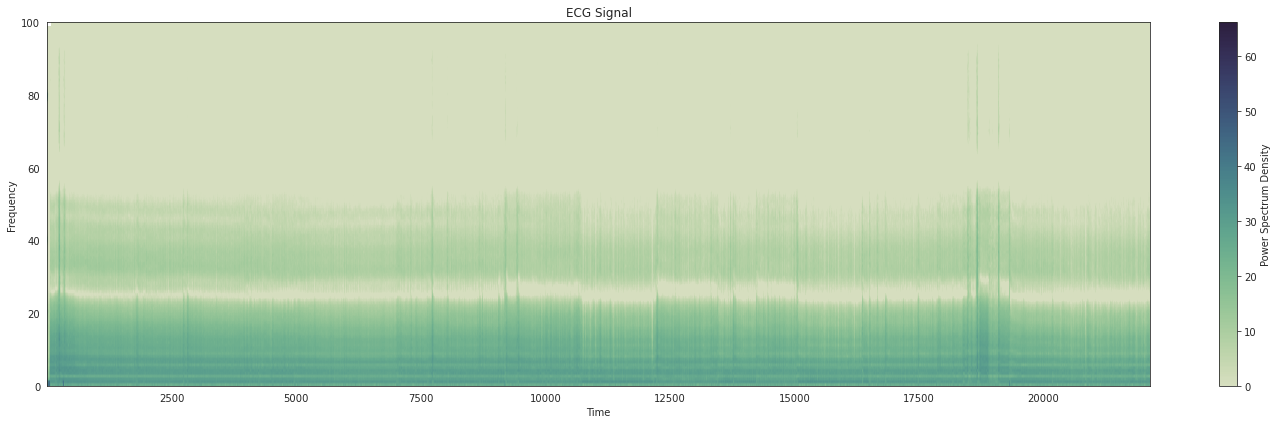

In [94]:
fig, ax = plt.subplots(figsize=(20, 6))

spectrum, freqs, t, im = ax.specgram(ecg1, Fs=200, cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True), vmin=0)

ax.set_xlabel('Time')
ax.set_ylabel('Frequency')
ax.set_title('ECG Signal')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Power Spectrum Density')
fig.tight_layout()
fig.show()

<AxesSubplot: xlabel='time'>

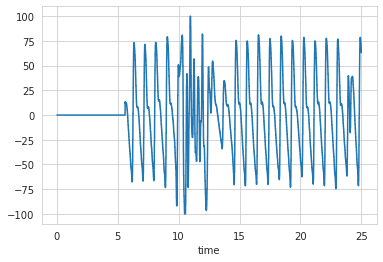

In [372]:
pleth.iloc[:5000].plot()

In [346]:
ar = AR(lags=500)
ar.fit(pleth.iloc[start:end+5000].values)

In [348]:
vs = ar.sample_innovation_var(10000)

In [349]:
bs = ar.sample_coeff(vs)

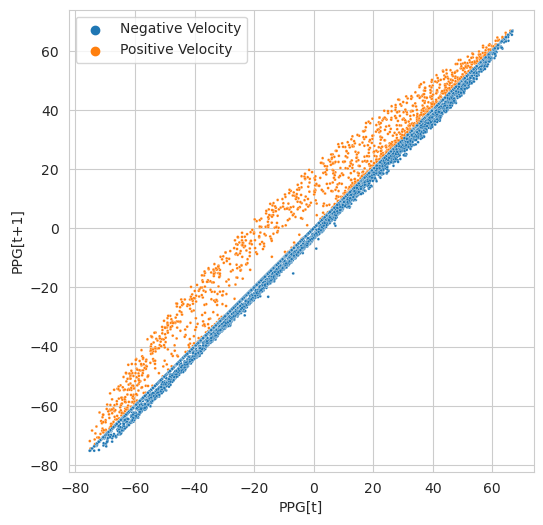

In [384]:
ax = plt.figure(figsize=(6, 6)).add_subplot()
sns.scatterplot(x=sr.shift(1).values, y=sr.values, hue=(sr.diff()>0).apply(lambda x: 'Negative Velocity' if not x else 'Positive Velocity'), ax=ax, s=4)

ax.set_xlabel('PPG[t]')
ax.set_ylabel('PPG[t+1]')
ax.legend(title='')

fig.tight_layout()
fig.show()

In [128]:
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(np.quantile(bs, [0.025, 0.975], axis=0).T)

In [357]:
sns.histplot(vs)

<AxesSubplot: ylabel='Count'>

/tmp/ipykernel_13690/1256630053.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


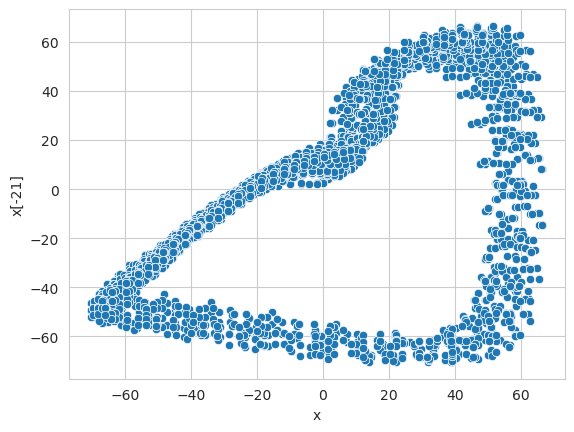

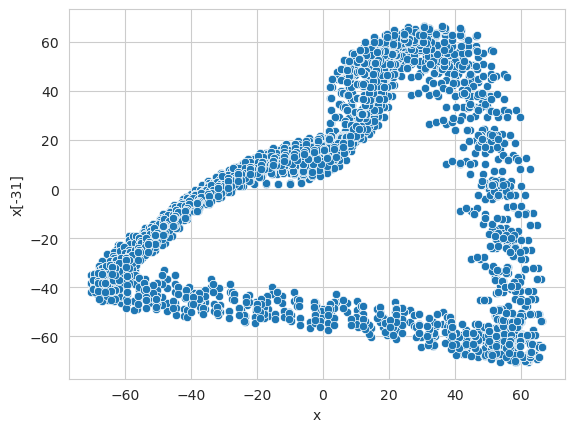

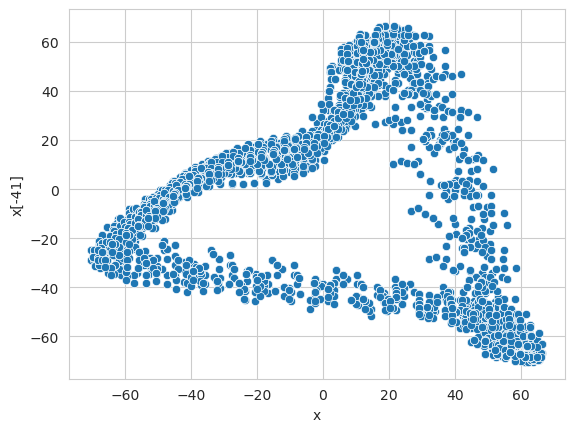

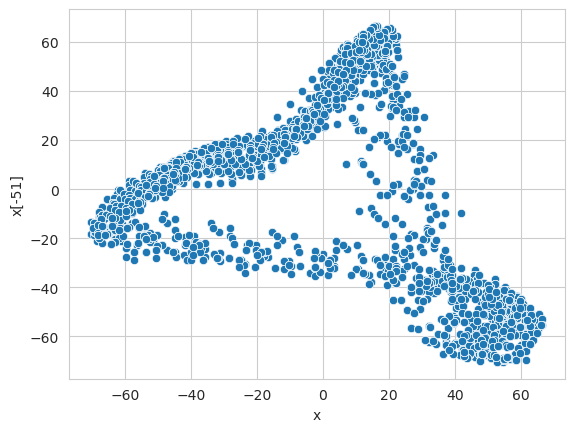

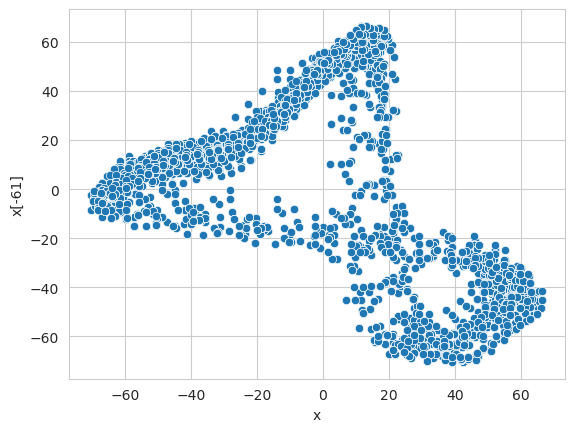

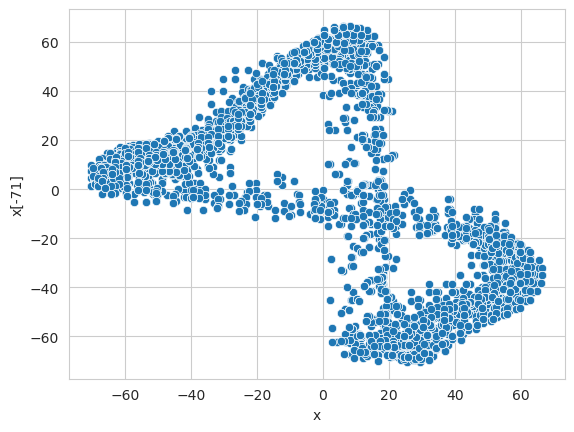

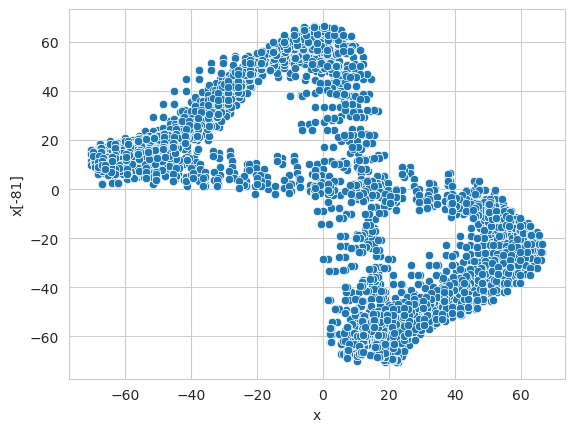

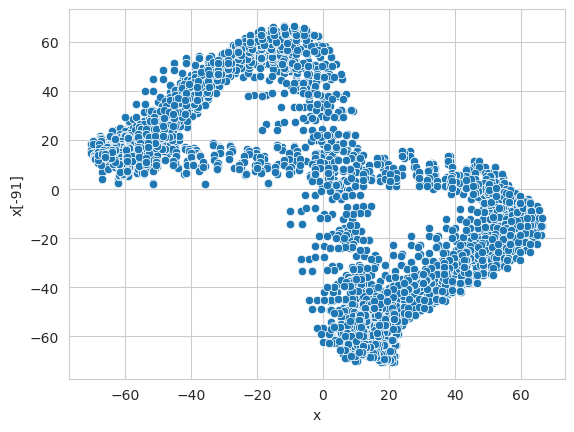

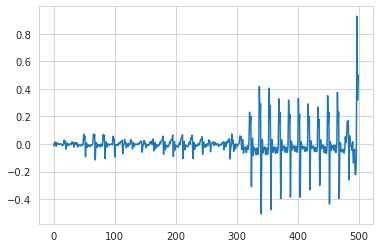

In [356]:
plt.plot(ar.coeff_)

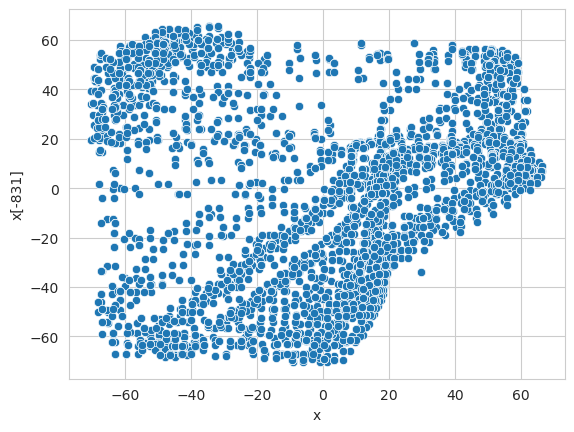

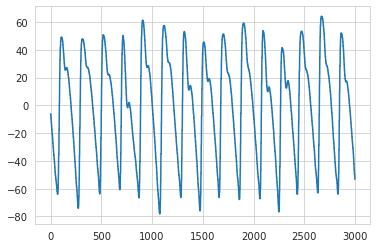

In [1030]:
plt.plot(pleth.iloc[start:start+3000].values)

In [1034]:
sr = pleth.iloc[start:start+2000].values

period = 10
dt = 0.005
L = 2000
ts = np.linspace(0, L-1, int(period/dt))
N = 50
A = np.zeros(2*N, dtype=np.complex128)
y_hat = np.zeros(int(period/dt), dtype=np.complex128)
for i, k in enumerate(range(-N, N)):
    phi_basis = np.exp(-2j*np.pi/(L-1)*k*ts)
    A[i] = sr @ phi_basis * dt/period

    phi_basis = np.exp(2j*np.pi/(L-1)*k*ts)
    y_hat += A[i] * phi_basis

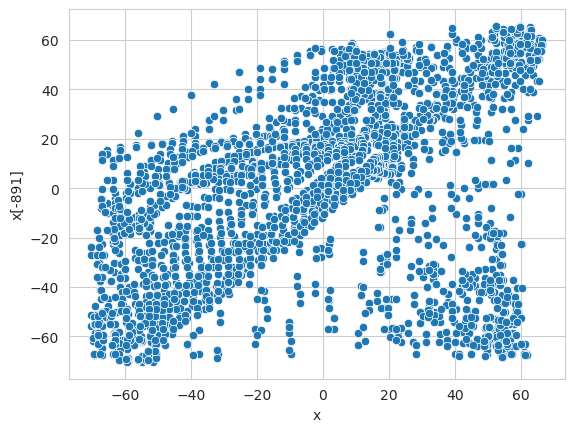

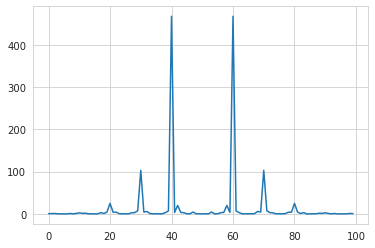

In [1035]:
plt.plot(np.abs(A)**2)

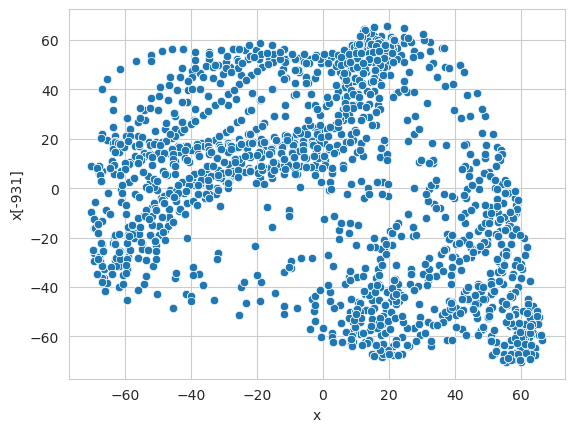

In [1036]:
plt.plot(np.array(y_hat).real)
plt.plot(sr)

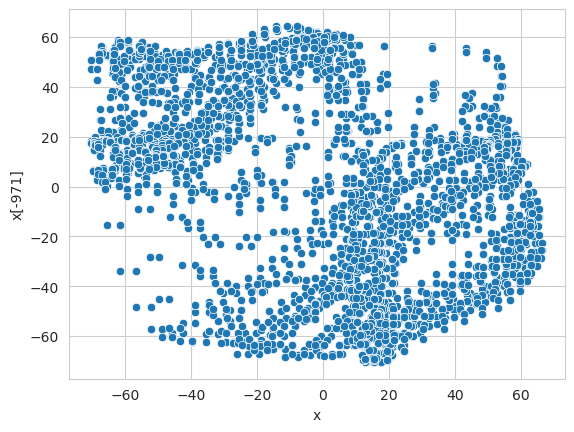

<Figure size 640x480 with 1 Axes>

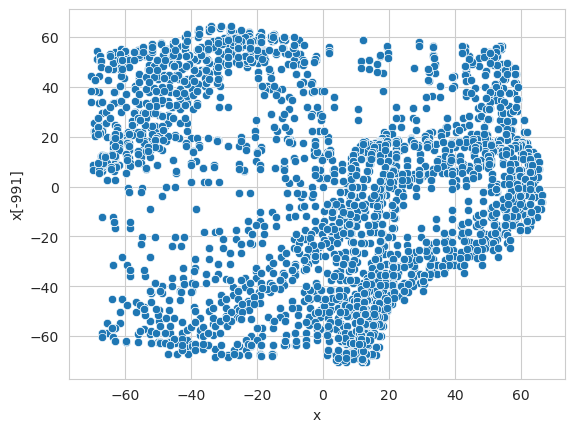

In [933]:
for i in range(1, 1000, 10):
    fig, ax = plt.subplots()
    sns.scatterplot(x=sr, y=sr.shift(i), ax=ax)
    ax.set_xlabel('x')
    ax.set_ylabel(f'x[-{i}]')

## Simple AR(p) model Exploration

In [6]:
sr = pleth.iloc[start:end+10000]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))

ax[0].plot(sr)
_ = sm.graphics.tsa.plot_acf(sr, lags=500, ax=ax[1])

fig.tight_layout()
fig.show()

<Figure size 2000x500 with 2 Axes>

In [12]:
ar = AR(lags=1000)
ar.fit(pleth.iloc[start:end+10000].values)

vs = ar.sample_innovation_var(10000)
bs = ar.sample_coeff(vs)

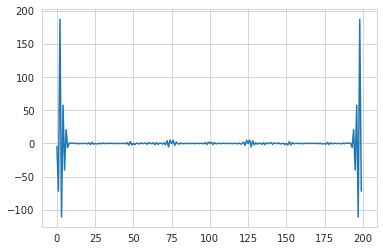

In [16]:
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(np.quantile(bs, [0.025, 0.975], axis=0).T)

<AxesSubplot:ylabel='Count'>

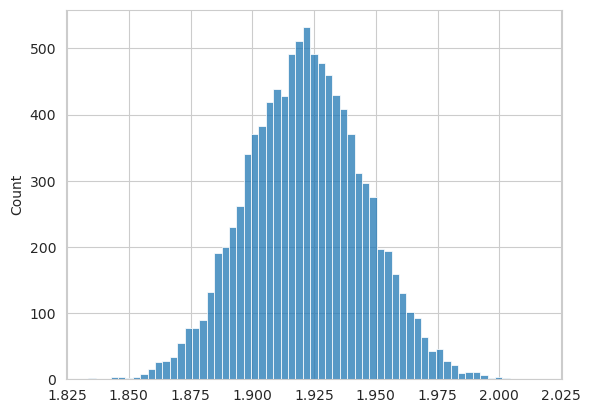

In [17]:
sns.histplot(vs)

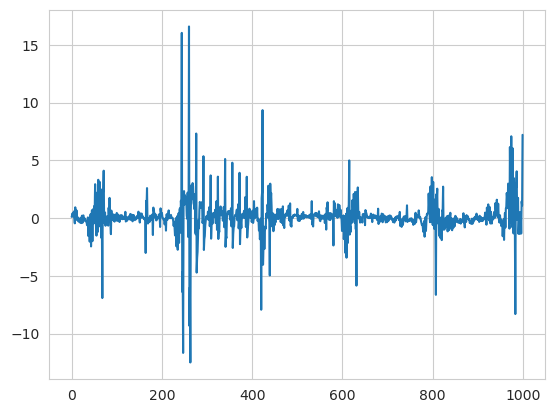

In [23]:
plt.plot(ar.resid_[:1000])

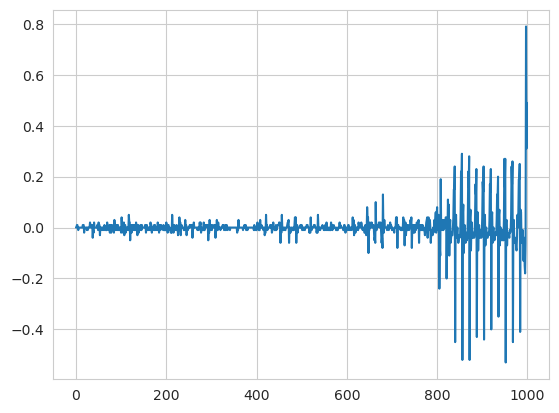

In [28]:
plt.plot(np.round(ar.coeff_, 2))

## PPG Freqency Content 

In [165]:
sr = pleth.iloc[start:start+2000].values

period = 10
dt = 0.005
L = 2000
ts = np.linspace(0, L-1, int(period/dt))
N = 50
A = np.zeros(2*N, dtype=np.complex128)
y_hat = np.zeros(int(period/dt), dtype=np.complex128)
for i, k in enumerate(range(-N, N)):
    phi_basis = np.exp(-2j*np.pi/(L-1)*k*ts)
    A[i] = sr @ phi_basis * dt/period

    phi_basis = np.exp(2j*np.pi/(L-1)*k*ts)
    y_hat += A[i] * phi_basis

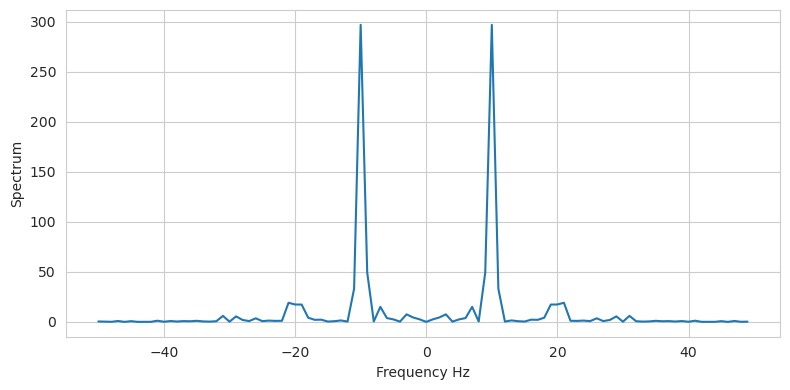

In [177]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(np.arange(-N, N), np.abs(A)**2)

ax.set_ylabel('Spectrum')
ax.set_xlabel('Frequency Hz')
fig.tight_layout()
fig.show()

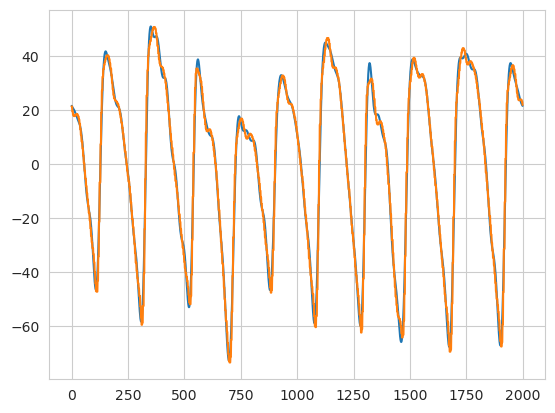

In [167]:
plt.plot(np.array(y_hat).real)
plt.plot(sr)

In [742]:
freqs = np.fft.fftfreq(500, 1/200)[:25]
As = np.fft.fft(pleth.iloc[start:start+1000].values)[:25]

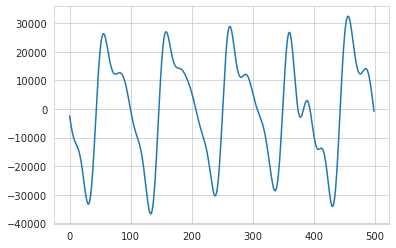

In [743]:
ts = np.linspace(0, 500-1, 500)
xs = np.zeros(500, dtype=np.complex128)

for i in range(20):
    xs += As[i] * np.exp(2j*np.pi*freqs[i]/200*ts)

plt.plot(ts, xs.real)

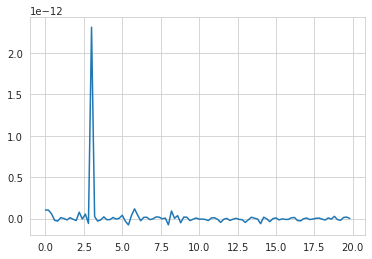

In [679]:
plt.plot(np.fft.fftfreq(5*freq, 1/freq)[:100], np.fft.fft(c1)[:100].real)

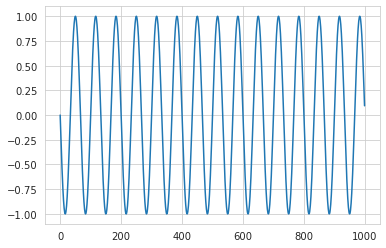

In [677]:
freq = 200  # sampling frequency
w = 3/freq  # 0.025 cycles / time unit, 40 points / cycle
ts = np.linspace(0, 5*freq-1, 5*freq)
c1 = np.cos(np.pi/2)*np.cos(2*np.pi*w*ts) - np.sin(np.pi/2)*np.sin(2*np.pi*w*ts)

plt.plot(ts, c1)

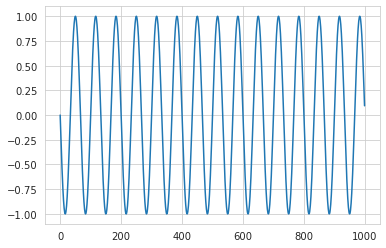

In [689]:
plt.plot(((np.cos(np.pi/2)+np.sin(np.pi/2)*1j) * np.exp(1j*2*np.pi*w*ts)).real)

## ECG Investigate

<AxesSubplot: xlabel='time'>

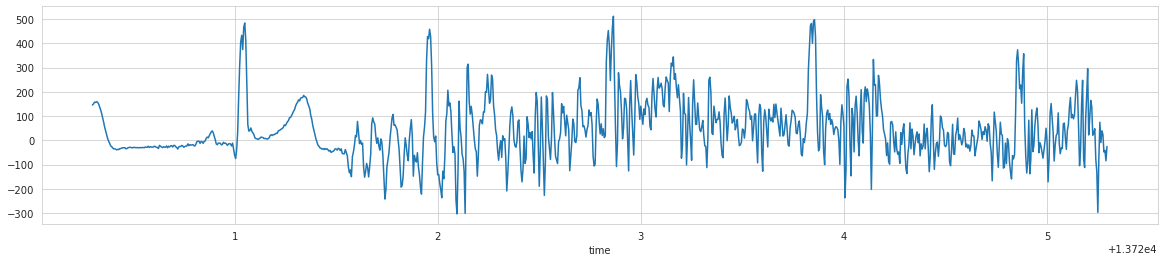

In [71]:
n = ecg1.shape[0]
start = np.random.randint(0, n)
end = np.min([n, start+1000])

ecg1.iloc[start:end].set_index('time')['ecg1'].plot(figsize=(20, 4))

<AxesSubplot: xlabel='time'>

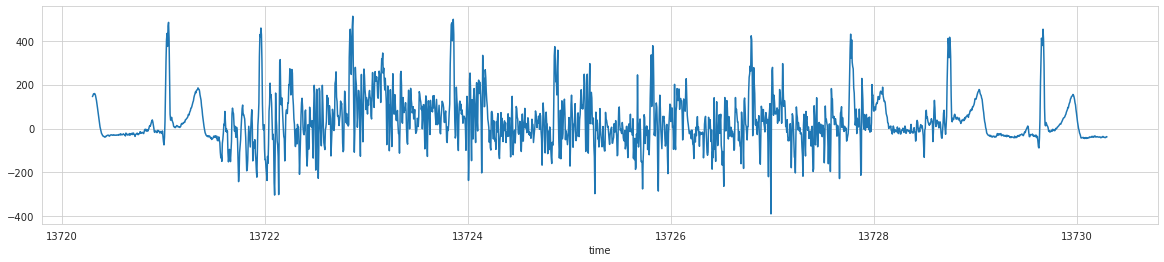

In [76]:
ecg1.iloc[start:end+1000].set_index('time')['ecg1'].plot(figsize=(20, 4))

<AxesSubplot: xlabel='time'>

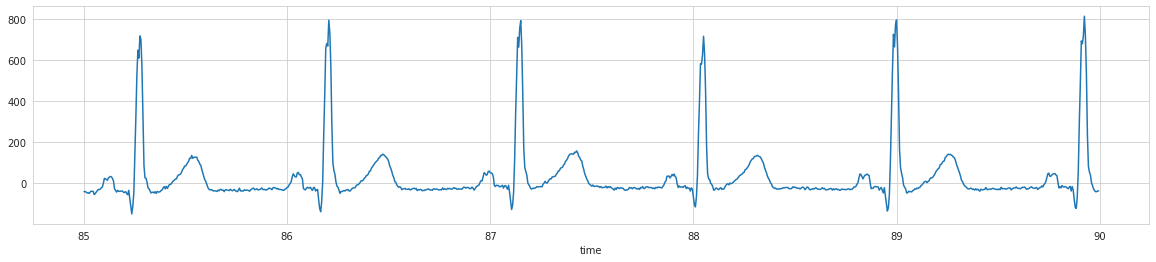

In [105]:
ecg1.iloc[17000:18000].plot(figsize=(20, 4))

In [210]:
sr = ecg1.iloc[16960:17560]
# sr -= sr.mean()
# sr /= sr.sum()

In [87]:
start, end

(2744060, 2745060)

<AxesSubplot: xlabel='time'>

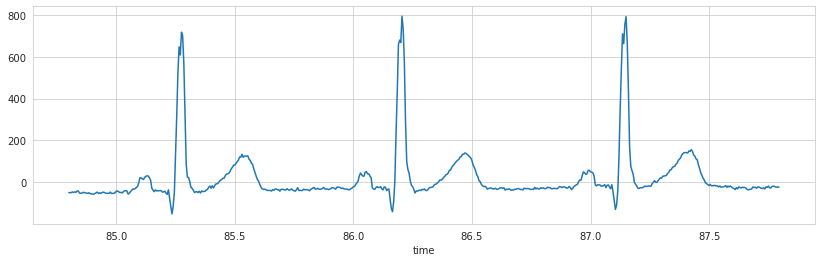

In [214]:
sr.plot(figsize=(14,4))